In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [30]:
source = 'planets_moons.xlsx'

def load_data(source, sheet_name=0):
    if source.endswith('.xlsx'):
        df = pd.read_excel(source, sheet_name, index_col=0)
    else:
        df = pd.read_csv(source, index_col=0)
    return df

raw_df = load_data(source)
raw_df

,type,mass_1024kg,diameter_km,density_kg_m3,gravity_m_s2,escape_vel_km_s,rotation_period_hr,day_len_hr,distance_from_sun_106_km,perihelion_106 km,...,H2,He,H2O,CH4,NH3,CO2,N2,O2,Ar,NaCl
name,,,,,,,,,,,,,,,,,,,,,
Mercury,planet,0.3300,4879.0,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,...,0.220,0.06000,0.00000,0.00000,0.0000,0.0000,0.000,0.4200,0.00000,0.22
Venus,planet,4.8700,12104.0,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,0.000,0.00002,0.00002,0.00000,0.0000,0.9650,0.035,0.0000,0.00007,0.00
Earth,planet,5.9700,12756.0,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,0.000,0.00000,0.04000,0.00000,0.0000,0.0003,0.781,0.2090,0.00930,0.00
Moon,moon,0.0730,3475.0,3340,1.6,2.4,655.7,708.7,149.6,147.1,...,0.000,0.29000,0.00000,0.00000,0.0000,0.0000,0.000,0.0000,0.70000,0.01
Mars,planet,0.6420,6792.0,3933,3.7,5.0,24.6,24.7,227.9,206.6,...,0.000,0.00000,0.00003,0.00000,0.0000,0.9530,0.027,0.0013,0.01600,0.00
Jupiter,planet,1898.0000,142984.0,1326,23.1,59.5,9.9,9.9,778.6,740.5,...,0.900,0.10000,0.00000,0.00240,0.0002,0.0000,0.000,0.0000,0.00000,0.00
Saturn,planet,568.0000,120536.0,687,9.0,35.5,10.7,10.7,1433.5,1352.6,...,0.960,0.04000,0.00000,0.00200,0.0002,0.0000,0.000,0.0000,0.00000,0.00
Titan,moon,0.1260,5149.4,1882,1.4,2.6,382.0,382.0,1433.5,1352.6,...,0.002,0.00000,0.00000,0.03000,0.0000,0.0000,0.820,0.0000,0.12000,0.00
Uranus,planet,86.8000,51118.0,1271,8.7,21.3,-17.2,17.2,2872.5,2741.3,...,0.850,0.15000,0.00000,0.00000,0.0000,0.0000,0.000,0.0000,0.00000,0.00


In [34]:
def preprocess_data(df, scaler=StandardScaler()):
    obj_to_cat = list(set(df.select_dtypes('object').columns.tolist()) & set(df.nunique()[df.nunique() <= 3].index.tolist()))
    df[obj_to_cat] = df[obj_to_cat].astype('category')
    obj_drop = list(set(df.select_dtypes('object').columns.tolist()) & set(df.nunique()[df.nunique() > 3].index.tolist()))
    df = df.drop(obj_drop, axis=1)
    for cat in df.select_dtypes('category').columns.tolist():
        df[cat] = df[cat].cat.codes
    columns = df.columns.tolist()
    index = df.index.tolist()
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns=columns, index=index)
    return df

stdz_df = preprocess_data(raw_df)
planets = stdz_df.loc[:, 'type':'atmospheric_mass_kg']
planets

,type,mass_1024kg,diameter_km,density_kg_m3,gravity_m_s2,escape_vel_km_s,rotation_period_hr,day_len_hr,distance_from_sun_106_km,perihelion_106 km,...,mean_temp_c,surface_pressure_bars,nbr_moons,rings,magnetic_field,equatorial_radius_km,mean_radius_km,"V(1,0) (mag)",geometric_albedo,atmospheric_mass_kg
Mercury,0.565685,-0.442264,-0.681977,1.429504,-0.606357,-0.686002,0.959204,2.568170,-0.809602,-0.855100,...,1.083267,-0.638729,-0.636013,-0.755929,0.832050,-0.681959,-0.685450,1.337086,-1.571555,-0.436378
Venus,0.565685,-0.433970,-0.530590,1.323681,0.241653,-0.331100,-3.070742,1.514217,-0.783215,-0.817084,...,2.605431,-0.429988,-0.636013,-0.755929,-0.693375,-0.530622,-0.529849,0.123991,1.675410,-0.436377
Earth,0.565685,-0.431961,-0.516928,1.479540,0.388424,-0.284556,0.189016,-0.546799,-0.761496,-0.792606,...,0.304247,-0.636428,-0.602698,-0.755929,0.832050,-0.516946,-0.516099,0.315203,-0.013728,-0.436375
Moon,-0.989949,-0.442733,-0.711396,0.229214,-0.948822,-0.796545,0.540685,-0.038815,-0.761496,-0.792606,...,0.124867,-0.638729,-0.636013,-0.755929,-0.693375,-0.711421,-0.715688,NaN,NaN,-0.436378
Mars,0.565685,-0.441694,-0.641894,0.570264,-0.606357,-0.645276,0.189406,-0.546279,-0.720419,-0.755826,...,-0.105764,-0.638706,-0.569383,-0.755929,-0.693375,-0.641910,-0.644525,1.048702,-1.308933,-0.436378
Jupiter,0.565685,3.024239,2.211778,-0.929091,2.557372,2.525566,0.181224,-0.557259,-0.431520,-0.425797,...,-0.336395,-0.634191,1.995870,1.322876,0.832050,2.211788,2.220835,-1.421373,0.899481,3.036693
Saturn,0.565685,0.594708,1.741418,-1.296597,0.257961,1.129232,0.181669,-0.556666,-0.087957,-0.047429,...,-0.490149,1.630200,2.095815,1.322876,0.832050,1.741423,1.717771,-1.258373,0.601047,0.550706
Titan,-0.989949,-0.442636,-0.676311,-0.609321,-0.981438,-0.784909,0.388340,-0.281196,-0.087957,-0.047429,...,-0.690029,-0.635099,-0.636013,-0.755929,-0.693375,-0.676337,-0.679622,NaN,-0.950812,-0.436377
Uranus,0.565685,-0.284308,0.286882,-0.960723,0.209037,0.303068,0.166139,-0.551843,0.666948,0.810993,...,-0.772031,1.630200,0.263491,1.322876,0.832050,0.286869,0.301922,-0.728623,0.839794,-0.279175
Neptune,0.565685,-0.256541,0.253567,-0.749652,0.584119,0.431065,0.184675,-0.552660,1.518170,1.863822,...,-0.797657,1.630200,-0.169604,1.322876,0.832050,0.253553,0.270047,-0.628316,0.242926,-0.253584


In [35]:
def feature_corr(df, target, corr_type='spearman'):
    target_corr = pd.DataFrame(df.corrwith(df[target], axis=0, method=corr_type).reset_index()).rename(columns={0:corr_type}).sort_values(corr_type, ascending=False)
    target_corr['abs'] = target_corr[corr_type].abs()
    top_features = target_corr.sort_values('abs', ascending=False).iloc[:21,:].sort_values(corr_type, ascending=False)['index'].tolist()
    df_top = df[top_features]
    feature_corr = df_top.corr(method=corr_type)
    return target_corr, df_top, feature_corr

target_corr, df_top, feature_corr = feature_corr(planets, 'atmospheric_mass_kg')

In [36]:
target_corr.head()

,index,spearman,abs
25,atmospheric_mass_kg,1.000000,1.000000
2,diameter_km,0.952166,0.952166
22,mean_radius_km,0.952166,0.952166
21,equatorial_radius_km,0.952166,0.952166
1,mass_1024kg,0.929387,0.929387


In [6]:
df_top.head()

,atmospheric_mass_kg,mean_radius_km,diameter_km,equatorial_radius_km,mass_1024kg,escape_vel_km_s,surface_pressure_bars,rings,gravity_m_s2,nbr_moons,...,magnetic_field,type,orbital_period_days,perihelion_106 km,orbital_eccentricity,rotation_period_hr,orbital_inclination_degrees,density_kg_m3,day_len_hr,"V(1,0) (mag)"
0,-0.436378,-0.685450,-0.681977,-0.681959,-0.442264,-0.686002,-0.638729,-0.755929,-0.606357,-0.636013,...,0.832050,0.565685,-0.614126,-0.855100,1.741370,0.959204,0.690697,1.429504,2.568170,1.337086
1,-0.436377,-0.529849,-0.530590,-0.530622,-0.433970,-0.331100,-0.429988,-0.755929,0.241653,-0.636013,...,-0.693375,0.565685,-0.609425,-0.817084,-0.890624,-3.070742,-0.075454,1.323681,1.514217,0.123991
2,-0.436375,-0.516099,-0.516928,-0.516946,-0.431961,-0.284556,-0.636428,-0.755929,0.388424,-0.602698,...,0.832050,0.565685,-0.604594,-0.792606,-0.757695,0.189016,-0.799041,1.479540,-0.546799,0.315203
3,-0.436378,-0.715688,-0.711396,-0.711421,-0.442733,-0.796545,-0.638729,-0.755929,-0.948822,-0.636013,...,-0.693375,-0.989949,-0.616213,-0.792606,-0.252565,0.540685,0.286339,0.229214,-0.038815,NaN
4,-0.436378,-0.644525,-0.641894,-0.641910,-0.441694,-0.645276,-0.638706,-0.755929,-0.606357,-0.569383,...,-0.693375,0.565685,-0.593530,-0.755826,0.265858,0.189406,-0.394684,0.570264,-0.546279,1.048702


In [7]:
feature_corr.head()

,atmospheric_mass_kg,mean_radius_km,diameter_km,equatorial_radius_km,mass_1024kg,escape_vel_km_s,surface_pressure_bars,rings,gravity_m_s2,nbr_moons,...,magnetic_field,type,orbital_period_days,perihelion_106 km,orbital_eccentricity,rotation_period_hr,orbital_inclination_degrees,density_kg_m3,day_len_hr,"V(1,0) (mag)"
atmospheric_mass_kg,1.000000,0.952166,0.952166,0.952166,0.929387,0.929387,0.861788,0.838568,0.824201,0.774063,...,0.612971,0.546687,0.469250,0.427919,-0.460138,-0.496584,-0.569478,-0.633259,-0.874718,-0.966667
mean_radius_km,0.952166,1.000000,1.000000,1.000000,0.981818,0.981818,0.813847,0.836660,0.865606,0.730430,...,0.738988,0.725324,0.354545,0.232879,-0.418182,-0.372727,-0.572727,-0.563636,-0.818182,-0.966667
diameter_km,0.952166,1.000000,1.000000,1.000000,0.981818,0.981818,0.813847,0.836660,0.865606,0.730430,...,0.738988,0.725324,0.354545,0.232879,-0.418182,-0.372727,-0.572727,-0.563636,-0.818182,-0.966667
equatorial_radius_km,0.952166,1.000000,1.000000,1.000000,0.981818,0.981818,0.813847,0.836660,0.865606,0.730430,...,0.738988,0.725324,0.354545,0.232879,-0.418182,-0.372727,-0.572727,-0.563636,-0.818182,-0.966667
mass_1024kg,0.929387,0.981818,0.981818,0.981818,1.000000,1.000000,0.772465,0.836660,0.924832,0.721125,...,0.789953,0.783349,0.381818,0.191783,-0.390909,-0.327273,-0.481818,-0.500000,-0.800000,-0.950000


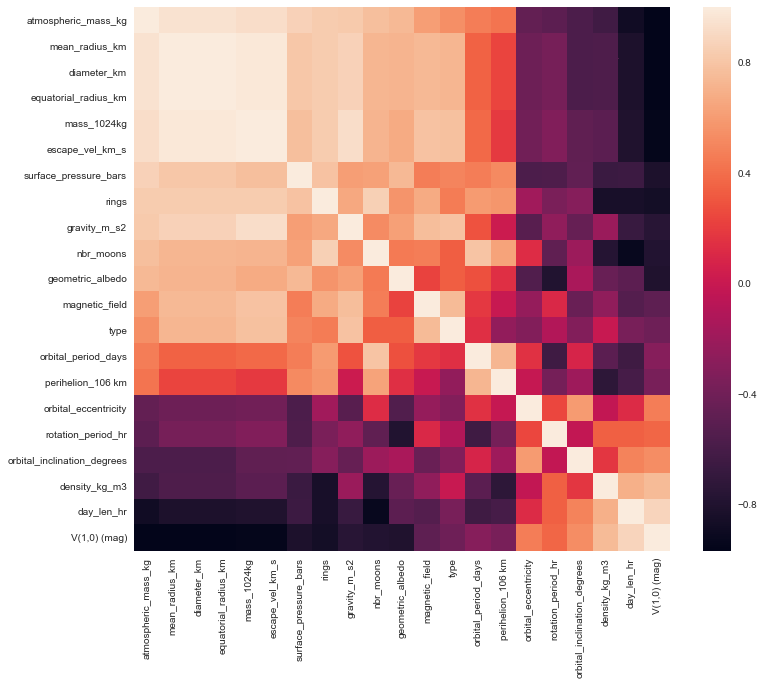

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(feature_corr)

In [9]:
def feature_coll(correlation_matrix, df_top):
    collinear_features = set()
    for i in range(len(correlation_matrix.columns)):
        sliced_matrix = correlation_matrix.iloc[i, :i]
        if sum(sliced_matrix[abs(sliced_matrix) > 0.9]):
            colname = correlation_matrix.columns[i]
            collinear_features.add(colname)
    collinear_features = list(collinear_features)
    print('Collinear features:', collinear_features)
    df = df_top.drop(collinear_features, axis=1)
    return df

noncoll_df = feature_coll(feature_corr, df_top)
noncoll_df

Collinear features: ['diameter_km', 'day_len_hr', 'mean_radius_km', 'gravity_m_s2', 'equatorial_radius_km', 'mass_1024kg', 'escape_vel_km_s', 'V(1,0) (mag)']


,atmospheric_mass_kg,surface_pressure_bars,rings,nbr_moons,geometric_albedo,magnetic_field,type,orbital_period_days,perihelion_106 km,orbital_eccentricity,rotation_period_hr,orbital_inclination_degrees,density_kg_m3
0,-0.436378,-0.638729,-0.755929,-0.636013,-1.571555,0.832050,0.565685,-0.614126,-0.855100,1.741370,0.959204,0.690697,1.429504
1,-0.436377,-0.429988,-0.755929,-0.636013,1.675410,-0.693375,0.565685,-0.609425,-0.817084,-0.890624,-3.070742,-0.075454,1.323681
2,-0.436375,-0.636428,-0.755929,-0.602698,-0.013728,0.832050,0.565685,-0.604594,-0.792606,-0.757695,0.189016,-0.799041,1.479540
3,-0.436378,-0.638729,-0.755929,-0.636013,NaN,-0.693375,-0.989949,-0.616213,-0.792606,-0.252565,0.540685,0.286339,0.229214
4,-0.436378,-0.638706,-0.755929,-0.569383,-1.308933,-0.693375,0.565685,-0.593530,-0.755826,0.265858,0.189406,-0.394684,0.570264
5,3.036693,-0.634191,1.322876,1.995870,0.899481,0.832050,0.565685,-0.468233,-0.425797,-0.332322,0.181224,-0.522376,-0.929091
6,0.550706,1.630200,1.322876,2.095815,0.601047,0.832050,0.565685,-0.247624,-0.047429,-0.225979,0.181669,-0.266992,-1.296597
7,-0.436377,-0.635099,-0.755929,-0.636013,-0.950812,-0.693375,-0.989949,-0.616601,-0.047429,-0.598180,0.388340,-0.735195,-0.609321
8,-0.279175,1.630200,1.322876,0.263491,0.839794,0.832050,0.565685,0.434629,0.810993,-0.372201,0.166139,-0.628786,-0.960723
9,-0.253584,1.630200,1.322876,-0.169604,0.242926,0.832050,0.565685,1.439029,1.863822,-0.837453,0.184675,-0.415966,-0.749652


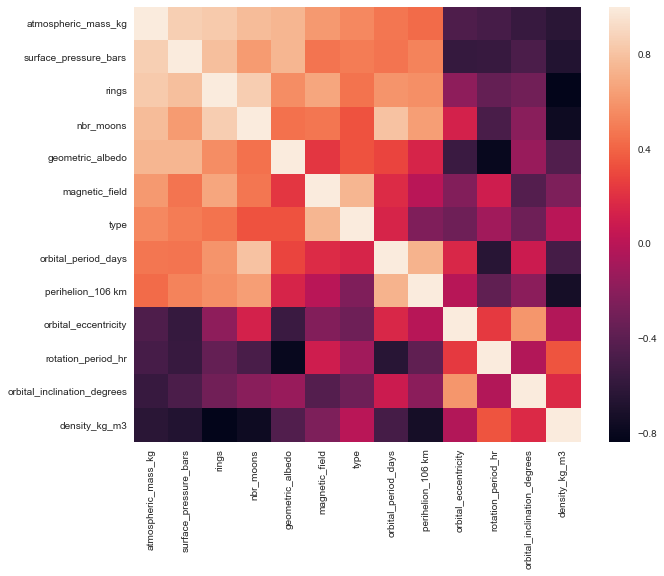

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(noncoll_df.corr('spearman'))

In [11]:
def model_df(df, target, model=LinearRegression()):
    df.fillna(-1, inplace=True)
    X = df.drop(target, axis=1)
    y = df[target]
    model.fit(X,y)
    return model

model = model_df(noncoll_df, 'atmospheric_mass_kg')

In [12]:
model.coef_

array([-1.20037217,  0.93644674,  0.35212755, -0.0888327 ,  0.20048196,
        0.21098026,  0.01737071,  0.00485371, -0.20910675, -0.12628823,
        0.31988387, -0.28666616])

In [21]:
raw_df

,type,mass_1024kg,diameter_km,density_kg_m3,gravity_m_s2,escape_vel_km_s,rotation_period_hr,day_len_hr,distance_from_sun_106_km,perihelion_106 km,...,H2,He,H2O,CH4,NH3,CO2,N2,O2,Ar,NaCl
name,,,,,,,,,,,,,,,,,,,,,
Mercury,planet,0.3300,4879.0,5427,3.7,4.3,1407.6,4222.6,57.9,46.0,...,0.220,0.06000,0.00000,0.00000,0.0000,0.0000,0.000,0.4200,0.00000,0.22
Venus,planet,4.8700,12104.0,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,0.000,0.00002,0.00002,0.00000,0.0000,0.9650,0.035,0.0000,0.00007,0.00
Earth,planet,5.9700,12756.0,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,0.000,0.00000,0.04000,0.00000,0.0000,0.0003,0.781,0.2090,0.00930,0.00
Moon,moon,0.0730,3475.0,3340,1.6,2.4,655.7,708.7,149.6,147.1,...,0.000,0.29000,0.00000,0.00000,0.0000,0.0000,0.000,0.0000,0.70000,0.01
Mars,planet,0.6420,6792.0,3933,3.7,5.0,24.6,24.7,227.9,206.6,...,0.000,0.00000,0.00003,0.00000,0.0000,0.9530,0.027,0.0013,0.01600,0.00
Jupiter,planet,1898.0000,142984.0,1326,23.1,59.5,9.9,9.9,778.6,740.5,...,0.900,0.10000,0.00000,0.00240,0.0002,0.0000,0.000,0.0000,0.00000,0.00
Saturn,planet,568.0000,120536.0,687,9.0,35.5,10.7,10.7,1433.5,1352.6,...,0.960,0.04000,0.00000,0.00200,0.0002,0.0000,0.000,0.0000,0.00000,0.00
Titan,moon,0.1260,5149.4,1882,1.4,2.6,382.0,382.0,1433.5,1352.6,...,0.002,0.00000,0.00000,0.03000,0.0000,0.0000,0.820,0.0000,0.12000,0.00
Uranus,planet,86.8000,51118.0,1271,8.7,21.3,-17.2,17.2,2872.5,2741.3,...,0.850,0.15000,0.00000,0.00000,0.0000,0.0000,0.000,0.0000,0.00000,0.00


In [18]:
raw_df.loc[4:5, 'name':'atmospheric_mass_kg']

,name,type,mass_1024kg,diameter_km,density_kg_m3,gravity_m_s2,escape_vel_km_s,rotation_period_hr,day_len_hr,distance_from_sun_106_km,...,mean_temp_c,surface_pressure_bars,nbr_moons,rings,magnetic_field,equatorial_radius_km,mean_radius_km,"V(1,0) (mag)",geometric_albedo,atmospheric_mass_kg
4,Mars,planet,0.642,6792.0,3933,3.7,5.0,24.6,24.7,227.9,...,-65,0.01,2,No,No,3396.19,3389.5,-1.52,0.15,2.500000e+16
5,Jupiter,planet,1898.000,142984.0,1326,23.1,59.5,9.9,9.9,778.6,...,-110,2.00,79,Yes,Yes,71492.00,69911.0,-9.40,0.52,1.900000e+27
